In [1]:
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt

Ici on regarde l'effet de l'ajout de la crowding distance dans la sélection NSGA2 et on la compare à la version précédente où la fin de la correction se faisait sans crowding distance en passant par une selection aléatoire sur la derniére couche.

In [20]:
data = pd.read_csv("../logs/2020-10-28T18:40:38.66.csv",names=["Date","Pkg","Info","Num","Max","Mean","Std"])

In [23]:
m=data.shape[0]

In [24]:
cent=[[],[],[]]
fros=[[],[],[]]
pacm=[[],[],[]]

In [25]:
for i in range(m//3):
    x=data[data["Num"]==i+1].values
    cent[0].append(x[0][4])
    cent[1].append(x[0][5])
    cent[2].append(x[0][6])
    fros[0].append(x[1][4])
    fros[1].append(x[1][5])
    fros[2].append(x[1][6])
    pacm[0].append(x[2][4])
    pacm[1].append(x[2][5])
    pacm[2].append(x[2][6])
    

Text(0.5, 1.0, 'Mean')

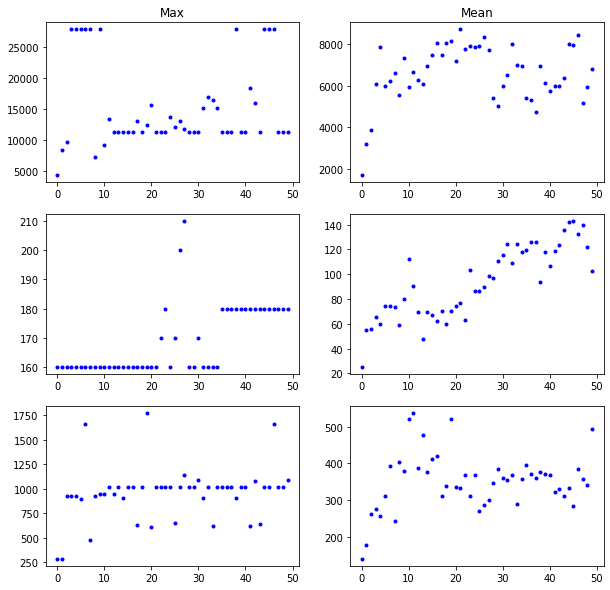

In [26]:
fig, ax = plt.subplots(nrows=3,ncols=2,figsize=(10,10))
ax[0,0].plot(cent[0],'b.')
ax[0,1].plot(cent[1],'b.')
ax[1,0].plot(fros[0],'b.')
ax[1,1].plot(fros[1],'b.')
ax[2,0].plot(pacm[0],'b.')
ax[2,1].plot(pacm[1],'b.')
ax[0,0].set_title("Max")
ax[0,1].set_title("Mean")

On voit se profiler un apprentissage par palier, ce qui est cohérent avec une sélection élitiste comme NSGA2. Cependant il y a toujours des "outliers" avec une exploration autour de ces paliers. Intuitivement, l'implémentation de la crowding distance devrait toujours sélectionner les meilleurs individus. L'apprentissage sur Frostbite (deuxiéme ligne) reste moindre mais s'améliore, apparition d'un deuxiéme pallier. Il reste à augmenter le nombre de colonne et chercher si l'absence de sauvegarde des élites est normal.

Text(0.5, 1.0, 'Mean')

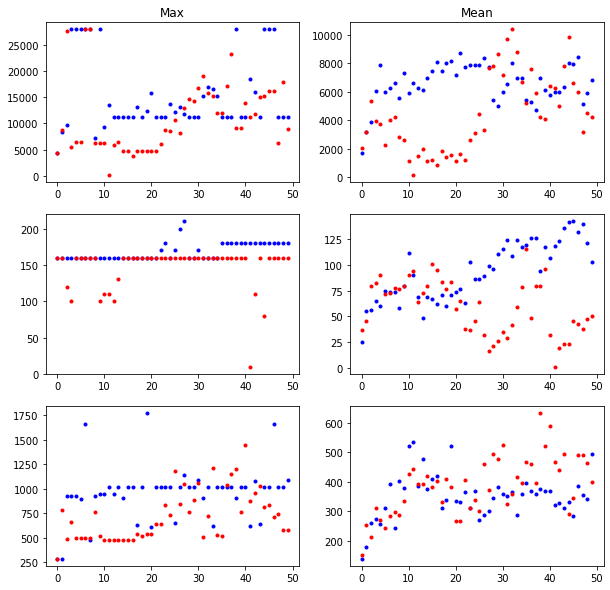

In [27]:
data2 = pd.read_csv("../logs/2020-10-28T15:59:19.257.csv",names=["Date","Pkg","Info","Num","Max","Mean","Std"])
m2=data2.shape[0]
cent2=[[],[],[]]
fros2=[[],[],[]]
pacm2=[[],[],[]]
for i in range(m2//3):
    x=data2[data2["Num"]==i+1].values
    cent2[0].append(x[0][4])
    cent2[1].append(x[0][5])
    cent2[2].append(x[0][6])
    fros2[0].append(x[1][4])
    fros2[1].append(x[1][5])
    fros2[2].append(x[1][6])
    pacm2[0].append(x[2][4])
    pacm2[1].append(x[2][5])
    pacm2[2].append(x[2][6])

fig, ax = plt.subplots(nrows=3,ncols=2,figsize=(10,10))
ax[0,0].plot(cent[0],'b.')
ax[0,1].plot(cent[1],'b.')
ax[1,0].plot(fros[0],'b.')
ax[1,1].plot(fros[1],'b.')
ax[2,0].plot(pacm[0],'b.')
ax[2,1].plot(pacm[1],'b.')
ax[0,0].plot(cent2[0],'r.')
ax[0,1].plot(cent2[1],'r.')
ax[1,0].plot(fros2[0],'r.')
ax[1,1].plot(fros2[1],'r.')
ax[2,0].plot(pacm2[0],'r.')
ax[2,1].plot(pacm2[1],'r.')
ax[0,0].set_title("Max")
ax[0,1].set_title("Mean")

Globalement l'apprentissage est beaucoup mieux avec l'implémentation de la crowding distance, ce qui signifit que pour ce probléme on a souvent $|F_1|>|Population|$ lorsque $|Population|=15$. Il est intéressant d'essayer l'apprentissage avec $|Population|>15$ pour vérifier si la crowding distance, dans l'état, influ beaucoup sur l'apprentissage. 